In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://masai-course.s3.ap-south-1.amazonaws.com/editor/uploads/2022-08-27/dataset_733962.plain')

In [3]:
df.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Using the dataset computed coefficients,intercept,mean_squared_error ,mean_absolute_error, r2_score and adjusted r2_score for following cases after minmax scaling:

1. Taking the most correlated feature (Simple Linear Regression)
2. Taking the top three correlated feature (Multiple Linear Regression) and name the features
3. Taking all feature (Multiple Linear Regression)

In [4]:
import seaborn as sns

In [35]:
label = df['Chance of Admit ']
label

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [36]:
input_1 = df.drop(['Unnamed: 0','Chance of Admit '], axis=1)
input_1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


<AxesSubplot:>

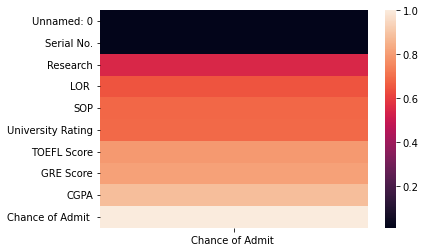

In [37]:
sns.heatmap(df.corr()[['Chance of Admit ']].sort_values('Chance of Admit '))

### 1. Taking the most correlated feature (Simple Linear Regression)

In [38]:
features_1 = df[['CGPA']]
features_1.head()

,CGPA
0,9.65
1,8.87
2,8.00
3,8.67
4,8.21


In [39]:
from sklearn import linear_model

In [40]:
model_1 = linear_model.LinearRegression()

In [67]:
from sklearn.model_selection import train_test_split

In [43]:
model_1.fit(features_1, label)

LinearRegression()

In [47]:
y_pred = model_1.predict(features_1)

### coefficients

In [44]:
model_1.coef_

array([0.20592168])

### intercept

In [45]:
model_1.intercept_

-1.0443349238990378

### mean_squared_error

In [48]:
import numpy as np

In [56]:
def mean_squared_error(actual, predicted):
    '''mean_squared_error is mean of square of difference between actual label and predicted label'''
    return ((actual-predicted)*(actual-predicted)).mean()

In [55]:
mean_squared_error(label, y_pred)

0.004400570156519552

### mean_absolute_error

In [58]:
def mean_absolute_error(actual, predicted):
    '''mean_absolute_error is mean of difference between actual label and predicted label'''
    return (actual-predicted).mean()

In [59]:
mean_absolute_error(label, y_pred)

-4.649614027130155e-16

### root_mean_squared_error

In [68]:
def root_mean_squared_error(actual, predicted):
    '''root_mean_squared_error is squareroot of mean of square of difference between actual label and predicted label'''
    import math
    val = ((actual-predicted)*(actual-predicted)).mean()
    return math.sqrt(val)

In [69]:
root_mean_squared_error(label, y_pred)

0.06633679338436213

In [83]:
import matplotlib.pyplot as plt

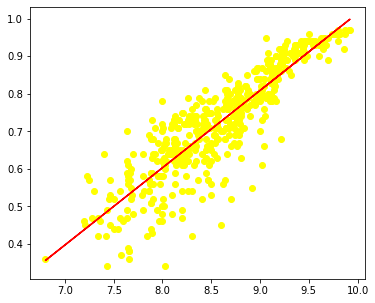

In [98]:
plt.figure(figsize=(6,5))
plt.scatter(features_1,label, color = 'yellow')
plt.plot(features_1.CGPA,y_pred, color = 'red')

### Top 3 features

1. CGPA
2. GRE Score
3. TOFEL Score

In [71]:
features_2 = df[['CGPA','GRE Score','TOEFL Score']]

In [73]:
features_2.head()

,CGPA,GRE Score,TOEFL Score
0,9.65,337,118
1,8.87,324,107
2,8.00,316,104
3,8.67,322,110
4,8.21,314,103


In [74]:
model_2 = linear_model.LinearRegression()

In [75]:
model_2.fit(features_2, label)

LinearRegression()

In [77]:
y_pred_1 = model_2.predict(features_2)

In [78]:
model_2.coef_

array([0.14357406, 0.00235195, 0.00319865])

In [79]:
model_2.intercept_

-1.5968093484832586

In [80]:
mean_squared_error(label,y_pred_1)

0.0038843713225257086

In [81]:
root_mean_squared_error(label,y_pred_1)

0.06232472480906521

In [82]:
mean_absolute_error(label,y_pred_1)

-3.836930773104541e-16

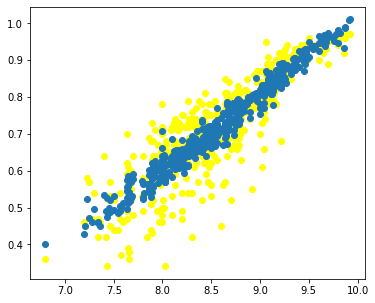

In [103]:
plt.figure(figsize=(6,5))
plt.scatter(features_2.CGPA,label, color = 'yellow')
plt.scatter(features_2.CGPA,y_pred_1)

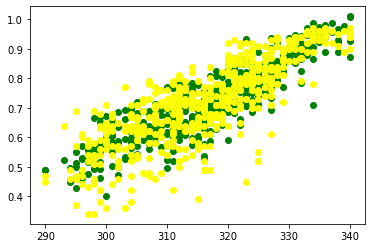

In [107]:
plt.scatter(features_2['GRE Score'] ,y_pred_1, color = 'green')
plt.scatter(features_2['GRE Score'] ,label, color = 'yellow')

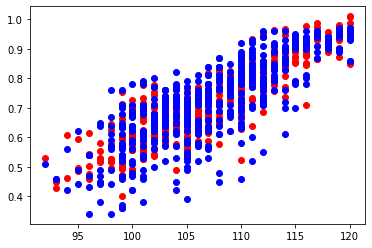

In [108]:
plt.scatter(features_2['TOEFL Score'] ,y_pred_1, color = 'red')
plt.scatter(features_2['TOEFL Score'] ,label, color = 'blue')

### Taking all features

In [109]:
df

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...,...
495,495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [111]:
features_3 = df.drop(['Unnamed: 0','Serial No.','Chance of Admit '], axis=1)

In [113]:
features_3.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [114]:
model_3 = linear_model.LinearRegression()

In [115]:
model_3.fit(features_3, label)

LinearRegression()

In [117]:
y_pred_2 = model_3.predict(features_3)

In [118]:
model_3.coef_

array([0.00185851, 0.00277797, 0.00594137, 0.00158614, 0.01685874,
       0.11838505, 0.02430748])

In [119]:
model_3.intercept_

-1.2757250829969875

In [121]:
mean_absolute_error(label, y_pred_2)

-4.3176573427672336e-16

In [122]:
mean_squared_error(label, y_pred_2)

0.003540750862254103

In [123]:
root_mean_squared_error(label, y_pred_2)

0.059504208777649524

In [124]:
from sklearn import metrics

In [125]:
metrics.r2_score(label, y_pred_2)

0.8219007395178417